# EXERCISE-1

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 4\\FuelConsumption.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


###  1. Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size. 

In [3]:

df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


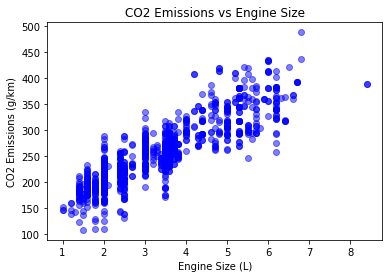

In [4]:
import matplotlib.pyplot as plt

# Plot CO2 Emissions vs Engine Size
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color='blue', alpha=0.5)
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

### 2. Split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

new_data = pd.DataFrame([[3.0, 6, 10.0]], columns=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'])
predicted_emission = model.predict(new_data)

print(f'Predicted CO2 Emissions for new data point: {predicted_emission[0]} g/km')

Mean Squared Error (MSE): 503.60315057448133
R-squared (R²): 0.8751447816602107
Predicted CO2 Emissions for new data point: 238.90698704783648 g/km


### 3. Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
def evaluate_polynomial_model(degree, X_train, X_test, y_train, y_test):
    poly=PolynomialFeatures(degree=degree)
    x_train_poly=poly.fit_transform(X_train)
    x_test_poly=poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    y_pred=model.predict(x_test_poly)
    
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum((y_test - y_pred) ** 2)  
    r2 = r2_score(y_test, y_pred)
    return mae, rss, r2, model
results = {}
for degree in [3, 4, 5]:
    mae, rss, r2, model = evaluate_polynomial_model(degree, X_train, X_test,y_train,y_test)
    results[degree] = {'MAE': mae, 'RSS': rss, 'R2': r2}
    
for degree in [3, 4, 5]:
    print(f"Degree {degree}:")
    print(f"  Mean Absolute Error (MAE): {results[degree]['MAE']}")
    print(f"  Residual Sum of Squares (RSS): {results[degree]['RSS']}")
    print(f"  R-squared (R²): {results[degree]['R2']}")
    print("-" * 50)    

best_degree = min(results, key=lambda x: results[x]['MAE']) 
print(f"\nThe best model is the polynomial regression with degree {best_degree}.")

Degree 3:
  Mean Absolute Error (MAE): 10.230711579367133
  Residual Sum of Squares (RSS): 87722.80578346297
  R-squared (R²): 0.9322474349854076
--------------------------------------------------
Degree 4:
  Mean Absolute Error (MAE): 9.645981137997635
  Residual Sum of Squares (RSS): 82952.5988710433
  R-squared (R²): 0.9359316964620019
--------------------------------------------------
Degree 5:
  Mean Absolute Error (MAE): 8.255203275108634
  Residual Sum of Squares (RSS): 74297.16373876068
  R-squared (R²): 0.9426167075750426
--------------------------------------------------

The best model is the polynomial regression with degree 5.


# EXERCISE-2 

In [12]:
db=pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 4\\Housing.csv")
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
db.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [15]:
features = db.drop(columns=['price'])  
target = db['price'] 
feature_encoded = pd.get_dummies(features)

## NORMAL REGRESSION MODEL

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing_data = pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 4\\Housing.csv")
features = housing_data.drop(columns=['price'])  
target = housing_data['price']  

features_encoded = pd.get_dummies(features)

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.30, random_state=42)

X_test.to_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 4\\HousePriceTest.csv", index=False)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [17]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

train_predictions = lr_model.predict(X_train_scaled)
test_predictions = lr_model.predict(X_test_scaled)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training Set Performance: MAE={train_mae}, MSE={train_mse}, RMSE={train_rmse}, R2={train_r2}")
print(f"Test Set Performance: MAE={test_mae}, MSE={test_mse}, RMSE={test_rmse}, R2={test_r2}")

Training Set Performance: MAE=720245.1987194591, MSE=963835379828.3596, RMSE=981751.1802021731, R2=0.6931989807027313
Test Set Performance: MAE=920392.9397607954, MSE=1523019469501.2908, RMSE=1234106.7496376846, R2=0.6463350878895878


### Performance Analysis:
#### Training Set Performance:
##### MAE (720,245): On average, the model's predictions are off by 720,245 units, which gives us an idea of the model’s error on the training data.MSE (963,835,379,828): The squared errors for the training predictions are relatively high, indicating some large errors. The MSE tends to grow as errors increase.
##### RMSE (981,751): This shows the average error magnitude is nearly 1 million, which is large considering this could be house prices.R² (0.693): This means that around 69% of the variance in the training data is explained by the model. It's a decent fit, but there is room for improvement.

#### Test Set Performance:
##### MAE (920,392): The test error is larger than the training error by about 200,000, which is a significant difference and could indicate overfitting. The model performs better on the training set but struggles more on the test set.
##### MSE (1,523,019,469,501): The MSE for the test set is significantly larger than for the training set, suggesting that the model is failing to generalize well.
##### RMSE (1,234,107): This is also higher than the training RMSE, further suggesting that the model is not generalizing well.
##### R² (0.646): The model explains only about 65% of the variance on the test data, which is lower than its performance on the training data. This reinforces the idea that the model is overfitting.

### Conclusion: Overfitting Identified
##### The fact that the R² score on the test set (0.646) is significantly lower than on the training set (0.693), along with the higher error metrics on the test set, suggests that the model might be overfitting the training data. Overfitting happens when the model performs well on the training data but fails to generalize to new, unseen data.

## RIDGE REGRESSION MODEL

In [18]:
ridge_model = Ridge(alpha=10.0)  
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f"Ridge Regression Performance: MAE={ridge_mae}, MSE={ridge_mse}, RMSE={ridge_rmse}, R2={ridge_r2}")


Ridge Regression Performance: MAE=918094.0564868874, MSE=1519829478584.4587, RMSE=1232813.6430882239, R2=0.6470758452336839


## LASSO REGRESSION MODEL

In [19]:
lasso_model = Lasso(alpha=1e-06)  
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f"Lasso Regression Performance: MAE={lasso_mae}, MSE={lasso_mse}, RMSE={lasso_rmse}, R2={lasso_r2}")

Lasso Regression Performance: MAE=920392.9397609088, MSE=1523019469502.0298, RMSE=1234106.749637984, R2=0.6463350878894162


### After Comparing Both Errors from Ridge and Lasso we can conclude that Ridge Model performs slightly better than Lasso in terms of all error metrics (MAE, MSE, and RMSE). The difference, however, is very minimal, so from a performance perspective, both models are quite close.

## Creating new csv file and evaluating the model.

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
unseen_data = pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 4\\HousePriceTest.csv")
unseen_data_encoded = pd.get_dummies(unseen_data)
training_data = pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 4\\Housing.csv")
features_train = training_data.drop(columns=['price'])
features_train_encoded = pd.get_dummies(features_train)
unseen_data_encoded = unseen_data_encoded.reindex(columns=features_train_encoded.columns, fill_value=0)
scaler = StandardScaler()
X_unseen_scaled = scaler.fit_transform(unseen_data_encoded)
ridge_model = Ridge(1.0)
lasso_model = Lasso(1.0)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_unseen_scaled)
lasso_predictions = lasso_model.predict(X_unseen_scaled)
unseen_data['Ridge_Predicted_Price'] = ridge_predictions
unseen_data['Lasso_Predicted_Price'] = lasso_predictions
unseen_data.to_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 4\\Predicted_HousePrices.csv", index=False)

In [26]:
ridge_train_predictions = ridge_model.predict(X_train_scaled)
lasso_train_predictions = lasso_model.predict(X_train_scaled)
ridge_train_mae = mean_absolute_error(y_train, ridge_train_predictions)
ridge_train_mse = mean_squared_error(y_train, ridge_train_predictions)
ridge_train_rmse = np.sqrt(ridge_train_mse)
ridge_train_r2 = r2_score(y_train, ridge_train_predictions)

lasso_train_mae = mean_absolute_error(y_train, lasso_train_predictions)
lasso_train_mse = mean_squared_error(y_train, lasso_train_predictions)
lasso_train_rmse = np.sqrt(lasso_train_mse)
lasso_train_r2 = r2_score(y_train, lasso_train_predictions)
print("Performance Analysis on Training Data (Ridge):")
print(f"MAE: {ridge_train_mae}")
print(f"MSE: {ridge_train_mse}")
print(f"RMSE: {ridge_train_rmse}")
print(f"R²: {ridge_train_r2}")
print("\nPerformance Analysis on Training Data (Lasso):")
print(f"MAE: {lasso_train_mae}")
print(f"MSE: {lasso_train_mse}")
print(f"RMSE: {lasso_train_rmse}")
print(f"R²: {lasso_train_r2}")

Performance Analysis on Training Data (Ridge):
MAE: 720162.0942223759
MSE: 963840091107.4456
RMSE: 981753.5796254809
R²: 0.6931974810428765

Performance Analysis on Training Data (Lasso):
MAE: 720244.9131580056
MSE: 963835379834.249
RMSE: 981751.1802051725
R²: 0.6931989807008566


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

ridge_test_predictions = ridge_model.predict(X_test_scaled)
lasso_test_predictions = lasso_model.predict(X_test_scaled)

ridge_test_mae = mean_absolute_error(y_test, ridge_test_predictions)
ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions)
ridge_test_rmse = np.sqrt(ridge_test_mse)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions)

lasso_test_mae = mean_absolute_error(y_test, lasso_test_predictions)
lasso_test_mse = mean_squared_error(y_test, lasso_test_predictions)
lasso_test_rmse = np.sqrt(lasso_test_mse)
lasso_test_r2 = r2_score(y_test, lasso_test_predictions)
print("Performance Analysis on Test Data (Ridge):")
print(f"MAE: {ridge_test_mae}")
print(f"MSE: {ridge_test_mse}")
print(f"RMSE: {ridge_test_rmse}")
print(f"R²: {ridge_test_r2}")

print("\nPerformance Analysis on Test Data (Lasso):")
print(f"MAE: {lasso_test_mae}")
print(f"MSE: {lasso_test_mse}")
print(f"RMSE: {lasso_test_rmse}")
print(f"R²: {lasso_test_r2}")

Performance Analysis on Test Data (Ridge):
MAE: 920153.6740992698
MSE: 1522626165807.7397
RMSE: 1233947.3918314911
R²: 0.6464264181181225

Performance Analysis on Test Data (Lasso):
MAE: 920393.0563346349
MSE: 1523020221491.312
RMSE: 1234107.0543074098
R²: 0.646334913267733


## In both cases Ridge is producing slightly more efficient models

In [28]:
from sklearn.metrics import r2_score
ridge_test_predictions = ridge_model.predict(X_test_scaled)
lasso_test_predictions = lasso_model.predict(X_test_scaled)

ridge_r2 = r2_score(y_test, ridge_test_predictions)
lasso_r2 = r2_score(y_test, lasso_test_predictions)
print("R² on Test Data (Ridge Regression):", ridge_r2)
print("R² on Test Data (Lasso Regression):", lasso_r2)

R² on Test Data (Ridge Regression): 0.6464264181181225
R² on Test Data (Lasso Regression): 0.646334913267733
